In [1]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.datasets.samples_generator import make_blobs
X_train , Y_train = make_blobs(n_samples=300, centers=2, n_features = 2, cluster_std = 6, random_state = 11)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from pandas import DataFrame

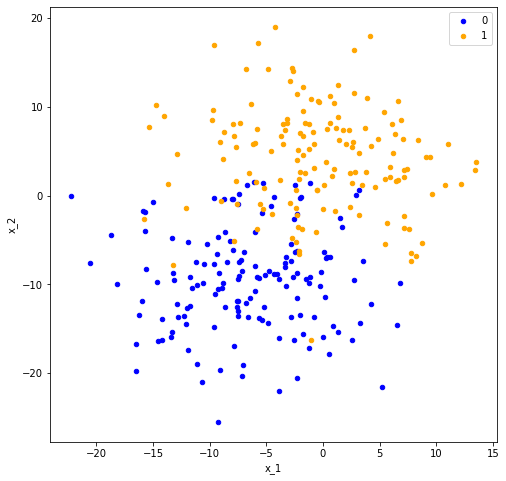

In [3]:
df = DataFrame(dict(x=X_train[:,0], y=X_train[:,1], label=Y_train))
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots(figsize=(8,8))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
    
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [4]:
def normalize(x):
    X1_min = min(X_train[:,0])
    X1_max = max(X_train[:, 1])
    
    f = lambda x:(x-X1_min)/(X1_max-X1_min)
    x[:,0] = f(x[:,0])
    
    X2_min = min(X_train[:, 1])
    X2_max = max(X_train[:, 1])
    
    f = lambda x :(x-X2_min)/(X2_max-X2_min)
    x[:, 1] = f(x[:, 1])
    
    return x

In [5]:
x = normalize(X_train)
print(x[0:5])

[[0.52026739 0.70438379]
 [0.19493619 0.2065585 ]
 [0.36931465 0.14400726]
 [0.5259798  0.58589566]
 [0.30768906 0.56762558]]


In [6]:
# the heart of KNN
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)):
        dist = np.sqrt(sum(np.square(X_tr[i]-new_point)))
        neighbor_arr.append([i, dist])
    neighbor_arr = sorted(neighbor_arr, key = lambda x :x[1])
    return neighbor_arr[0:k]

In [7]:
# CLASSIFICATION

from collections import Counter
def classifier(neighbor_arr):
    class_arr = [Y_train[i[0]] for i in neighbor_arr]
    
    return Counter(class_arr).most_common(1)[0][0]

In [8]:
new_points = np.array([[-10, -10],
                      [0, 10],
                      [-15, 10],
                      [5, -2]])

In [9]:
new_points = normalize(new_points)

In [10]:
knn = find_neighbors(4, x, new_points[1])
classifier(knn)

1

In [11]:
from sklearn.datasets.samples_generator import make_regression
X_train , Y_train = make_regression(n_samples = 300, n_features = 2, n_informative = 2, noise = 5, bias = 30, random_state=200)

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig  = plt.figure(figsize=(8,8))
ax = fig.subplots(111, projection = '3d')
ax.scatter(X_train[:,0], X_train[:,1], Y_train, c='red', alpha = .5, marker = '0')


TypeError: subplots() got an unexpected keyword argument 'projection'

<Figure size 576x576 with 0 Axes>